# Homework 2 (HW2)

By the end of this homework, we expect you to be able to:

- Preprocess data and make it amenable to statistical analysis and machine learning models;
- Train and test out-of-the-box machine learning models in `sklearn`;
- Carry out simple multivariate regression analyses using `statsmodels`;
- Use propensity score matching to estimate treatment effects;

---

## Important Dates

- Homework release: Fri 15 Nov 2024
- **Homework due**: Fri 29 Nov 2024, 23:59
- Grade release: Mon 09 Dec 2024

---

##  Some rules

1. You are allowed to use any built-in Python library that is included in the `requirements.txt` for this homework. If you use any additional library, this may complicate the grading process, and we reserve the right to penalize your grade for unnecessary complexity of the solution. All the questions can be solved with the libraries in `requirements.txt`.
2. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the *master/main* branch. If there are multiple notebooks present, we will **not grade** anything.
3. We will **not run your notebook for you**! Rather, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
4. In continuation to the previous point on additional library, interactive plots, such as those generated using `plotly`, should be **strictly avoided**!

**A Note on using Language Models (LMs)**

If you try hard enough, you will likely get away with cheating. Fortunately, our job is not to police, but rather to educate! So, please consider the following:

Presumably, you are taking this course to learn something! LMs are not always right ([they often fail in silly ways](https://community.openai.com/t/why-9-11-is-larger-than-9-9-incredible/869824/4)). This course should prepare you to detect when they are wrong!
Some of the TAs on this course literally published many works on detecting machine-generated text.

Here LLM includes but not limited to chatbots like ChatGPT, coding assistants like Copilot. Do not even use them to prettify your code or correct English. If you are caught using LLMs, you will be reported to the instructor and subject to the consequences. 


---


## Grading 
- The homework has a total of 100 points, distributed as follows:
    - Part 1: Data Preprocessing ( 20 points)
    - Part 2: Linear Regression (30 points)
    - Part 3: Supervised Learning (40 points)
    - Part 4: Propensity Score Matching (10 points)

## Context

Within EPFL's master program, you are excited to start an internship as a data scientist.
After rounds of interviews, you have been selected to work with the biggest car dealership in Switzerland !

Your mentor at the company Tim, has explained to you that the company is interested in a pricing model for used cars. 

- Tim: "We have a lot of used cars in our inventory, and we need to determine the price at which we should sell these cars. We have some ideas about the factors that influence the price of a used car, but so far we have just been using our experience and intuition to determine the price of a used car. Sometimes it works, but probably we can do better and a more data-driven approach would also help our new employees in the sales team as they have less experience."

- You: "That sounds like a great project! What kind of data do we have?"

- Tim: "We sell all kinds of cars here, but maybe we can start with a specific brand and model. For example, the Toyota Corolla is the best-selling car worldwide in 2023, and we have a lot of data on it. We can start by analyzing the data on used Toyota Corolla cars. If it works well, we can extend the analysis to other brands."

The dataset contains the following columns:

- `Age`: Age of the car in months.
- `Mileage`: Number of distance the car has been driven. (km or miles)
- `FuelType`: Fuel type of the car (Petrol, Diesel, or CNG)
- `HP`: Horsepower
- `MetColor`: Is the color of the car metallic? (Yes=1, No=0)
- `Automatic`: Is the car automatic? (Yes=1, No=0)
- `CC`: Cylinder volume in cubic centimeters
- `Doors`: Number of doors
- `Weight`: Weight of the car in kilograms
- `Price`: Price of the car in euros


## Data

The data is provided in the `data` folder and it contains the following 3 csv files:
- `Task1-2.ToyotaCorolla-clean.csv` and `Task1-2.ToyotaCorolla-raw.csv` for Part 1 and Part 2
- `Task3.ToyotaCorolla_sales_3months.csv` for Part 3
- `Task4.ToyotaCorolla_discount_sales` for Part 4

You should not use any other data source for this homework.

## References:

The data is based on the ToyotaCorolla dataset from the UCI Machine Learning Repository [here](https://archive.ics.uci.edu/ml/datasets/Toyota+Corolla).
We have made some modifications to the original dataset, so please use the data provided in the `data` folder in the course repo.

## Task 1 (20 pts) - Get to know the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import random
import sklearn
import csv

# fix random seed for reproducibility
np.random.seed(42)
random.seed(42)


**1.1 (2 pts)**: Load the data from the file `Task1-2.ToyotaCorolla-raw.csv` into a pandas DataFrame. Display the first 5 rows of the DataFrame. Hint: A naive loading of the data will raise an error. You will need to figure out how to load the data correctly. (Hint: localise which row is causing the error)

In [2]:
# Fonction pour gérer les lignes problématiques
def handle_bad_line(line):
    """
    Réassemble les champs pour les lignes mal formatées.
    """
    # Rejoindre les champs avec des virgules pour reconstruire la ligne
    # ou appliquer une logique spécifique pour corriger
    return [line[0] + line[1]] + line[2:]  # Merge the first two elements without a comma and keep the rest as is

# Lire le fichier CSV en appelant la fonction pour gérer les lignes problématiques
df_raw = pd.read_csv(
    "data/Task1-2.ToyotaCorolla-raw.csv",
    delimiter=",",  # Séparateur
    on_bad_lines=handle_bad_line,  # Fonction pour traiter les mauvaises lignes
    engine="python"  # Utiliser l'engine 'python' pour une gestion plus flexible
)



In [3]:
df_raw.head(5)

,Price,Age,Mileage,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Currency
0,13500.0,23.0,46986.0,Diesel,90.0,1.0,0.0,2000.0,3.0,1165.0,EURO
1,11878.0,23.0,72937.0,Diesel,90.0,1.0,0.0,2000.0,3.0,1165.0,CHF
2,12050.0,24.0,41711.0,Diesel,90.0,1.0,0.0,2000.0,3.0,1165.0,CHF
3,12914.0,26.0,48000.0,Diesel,90.0,0.0,0.0,2000.0,3.0,1165.0,CHF
4,11878.0,30.0,38500.0,Diesel,90.0,0.0,0.0,2000.0,3.0,1170.0,CHF


**1.2 (2 pts)**: Check if there are nan values in the Dataframe. If there are, try to find out which row is problematic and fix it. If you can't fix it, drop the row.

In [4]:
# Check for NaN values in the DataFrame
nan_counts = df_raw.isna().sum()
print(nan_counts)
# Sum over all rows
nan_sum = df_raw.isna().sum().sum()
print(f"Total NaN values in the DataFrame: {nan_sum}")

# Find the rows with NaN values
nan_rows = df_raw[df_raw.isna().any(axis=1)]
print(f"Index of the row with NaN values: {nan_rows.index.tolist()}")
print(nan_rows)

Price        0
Age          1
Mileage      1
FuelType     1
HP           1
MetColor     1
Automatic    1
CC           1
Doors        1
Weight       1
Currency     1
dtype: int64
Total NaN values in the DataFrame: 10
Index of the row with NaN values: [906]
                                                Price  Age Mileage FuelType  \
906  8423.0;68;58860.0;Petrol;110;1;0;1600;3;1055;CHF  NaN    None     None   

     HP  MetColor  Automatic  CC  Doors  Weight Currency  
906 NaN       NaN        NaN NaN    NaN     NaN     None  


In [5]:
# Fix the problematic row by replacing ';' with ',' and splitting the values
fixed_row = nan_rows.iloc[0, 0].replace(';', ',').split(',')

# Update the DataFrame with the fixed row
df_raw.iloc[907] = fixed_row

# Verify the fix
df_raw.iloc[907]

C:\Users\thier\AppData\Local\Temp\ipykernel_13116\4274883452.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '68' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_raw.iloc[907] = fixed_row
C:\Users\thier\AppData\Local\Temp\ipykernel_13116\4274883452.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '110' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_raw.iloc[907] = fixed_row
C:\Users\thier\AppData\Local\Temp\ipykernel_13116\4274883452.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_raw.iloc[907] = fixed_row
C:\Users\thier\AppData\Local\Temp\ipyker

Price         8423.0
Age               68
Mileage      58860.0
FuelType      Petrol
HP               110
MetColor           1
Automatic          0
CC              1600
Doors              3
Weight          1055
Currency         CHF
Name: 907, dtype: object

**1.3 (4 pts): Compute the mean, median of the `Price` column.**

1. Compute the mean and median of the `Price` column. If you encounter error, try to understand why this error is happening and propose a solution.
2. After computing the mean and median, do you think they are reasonable? If not, what could be the reason for this? 
  
Hint: Is all values in the `Price` column numerical?


In [6]:
# Print the problematic row
print(df_raw.iloc[34])

# Handle problematic rows by splitting the values and taking the first element
prices = df_raw["Price"].apply(lambda x: x.split(';')[0] if isinstance(x, str) else x)

# Remove unwanted characters and convert the 'Price' column to numeric
prices = prices.str.replace(",", "").str.replace("£", "").str.replace("CHF", "")
prices = pd.to_numeric(prices)

# Calculate the IQR for the 'Price' column
Q1 = prices.quantile(0.25)
Q3 = prices.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify the massive outliers
massive_outliers = prices[prices > upper_bound + 1.5 * IQR]
print(massive_outliers.sort_values(ascending=False))

# We identify the massive outliers and update the prices
prices[34] /= 1e12

Price        15,398,499999999998
Age                         22.0
Mileage       25465.838509316767
FuelType                  Petrol
HP                          97.0
MetColor                     1.0
Automatic                    0.0
CC                        1400.0
Doors                        3.0
Weight                    1100.0
Currency                     GBP
Name: 34, dtype: object
34     1.539850e+16
109    2.807400e+04
111    2.701600e+04
110    2.677900e+04
179    2.250000e+04
116    2.195000e+04
115    2.158800e+04
113    2.155200e+04
112    2.155200e+04
147    2.116400e+04
141    2.068900e+04
171    2.051600e+04
168    2.050000e+04
138    1.986900e+04
114    1.982500e+04
175    1.981795e+04
16     1.965200e+04
148    1.945000e+04
14     1.943600e+04
Name: Price, dtype: float64


In [7]:
# Compute the mean and median of the 'prices' column
mean_price = prices.mean()
median_price = prices.median()

print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")

Mean Price: 9439.987368754348
Median Price: 8595.0


**1.4 (4 pts): Convert Units**

From now on, we will work with the cleaned data `Task1-2.ToyotaCorolla-clean.csv`. Read it into a DataFrame.

You notice that some prices are in CHF (Swiss Francs), while others are in EUR (Euros) or GBP (British Pounds). Additionally, for cars priced in GBP, the mileage is in miles rather than kilometers.

For consistency, convert all prices to CHF and all distances to kilometers.

- Exchange rates:
  - 1 CHF = 1.05 EUR
  - 1 GBP = 1.15 CHF
  - 1 mile = 1.61 km

Make the following conversions:
1. Convert prices in EUR or GBP to CHF, rounding to the nearest integer.
2. Convert distances in miles (for GBP cars) to kilometers, rounding to the nearest integer.
3. Drop the 'Currency' column.
4. Calculate the min, mean, median and max of the 'Price' and 'Distance' columns after the conversion.

In [8]:
df_clean = pd.read_csv("data/Task1-2.ToyotaCorolla-clean.csv")

# Convert prices to CHF
def convert_price(row):
    if row['Currency'] == 'EURO':
        return round(row['Price'] * 1.05)
    elif row['Currency'] == 'GBP':
        return round(row['Price'] * 1.15)
    else:
        return row['Price']

df_clean['Price'] = df_clean.apply(convert_price, axis=1)

# Convert distances to kilometers for GBP cars
def convert_distance(row):
    if row['Currency'] == 'GBP':
        return round(row['Mileage'] * 1.61)
    else:
        return round(row['Mileage'])

df_clean['Mileage'] = df_clean.apply(convert_distance, axis=1)

# Drop the 'Currency' column
df_clean = df_clean.drop(columns=['Currency'])

# Calculate the min, mean, median, and max of the 'Price' and 'Mileage' columns
price_stats = {
    'min': df_clean['Price'].min(),
    'mean': df_clean['Price'].mean(),
    'median': df_clean['Price'].median(),
    'max': df_clean['Price'].max()
}

mileage_stats = {
    'min': df_clean['Mileage'].min(),
    'mean': df_clean['Mileage'].mean(),
    'median': df_clean['Mileage'].median(),
    'max': df_clean['Mileage'].max()
}

print("Price statistics:", price_stats)
print("Mileage statistics:", mileage_stats)

Price statistics: {'min': 3758.0, 'mean': 9527.069637883009, 'median': 8595.0, 'max': 28074.0}
Mileage statistics: {'min': 1, 'mean': 68533.25974930362, 'median': 63389.5, 'max': 243000}


**1.5 (2 pts): Analyze Average Price**

A.  Print the average price for each fuel type. Determine which fuel type has the highest average price.

B.  Print the average price for different numbers of doors. Determine which number of doors has the highest average price.

In [9]:
#A

# Calculate the average price for each fuel type
average_price_per_fuel_type = df_clean.groupby('FuelType')['Price'].mean()
print(average_price_per_fuel_type)

# Determine which fuel type has the highest average price
highest_avg_price_fuel_type = average_price_per_fuel_type.idxmax()
print(f"The fuel type with the highest average price is: {highest_avg_price_fuel_type}")

FuelType
CNG       8383.235294
Diesel    9973.554839
Petrol    9487.702532
Name: Price, dtype: float64
The fuel type with the highest average price is: Diesel


In [10]:
#B
df_clean

# Calculate the average price for each nb of doors
average_price_per_nb_doors = df_clean.groupby('Doors')['Price'].mean()
print(average_price_per_nb_doors)

# Determine which fuel type has the highest average price
highest_avg_price_nb_doors = average_price_per_nb_doors.idxmax()
print(f"The car with the number of doors with the highest average price is: {highest_avg_price_nb_doors}")

Doors
2     6997.500000
3     8991.770096
4     8695.557971
5    10198.826409
Name: Price, dtype: float64
The car with the number of doors with the highest average price is: 5


**1.6 (2 pts): Relationship Between Car Age and Price**

It is intuitive that an older car tends to be cheaper, and a car with more mileage might also be less expensive. 

To explore this intuition, create two scatter plots:
1. Car Age vs Price
2. Mileage vs Price

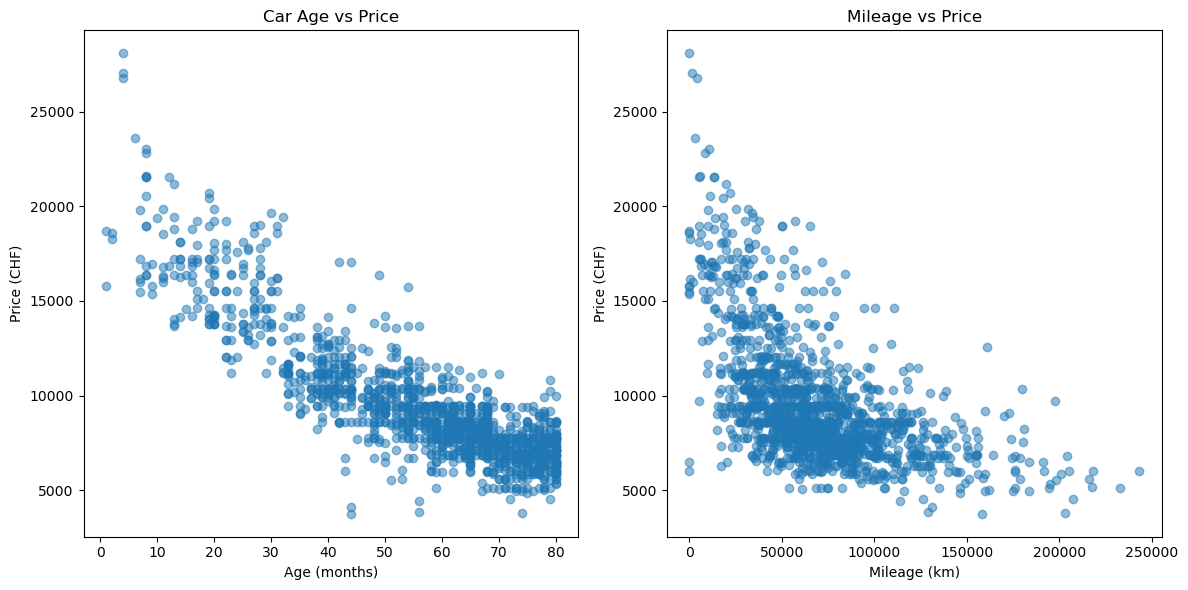

In [11]:
# Scatter plot for Car Age vs Price
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df_clean['Age'], df_clean['Price'], alpha=0.5)
plt.title('Car Age vs Price')
plt.xlabel('Age (months)')
plt.ylabel('Price (CHF)')

# Scatter plot for Mileage vs Price
plt.subplot(1, 2, 2)
plt.scatter(df_clean['Mileage'], df_clean['Price'], alpha=0.5)
plt.title('Mileage vs Price')
plt.xlabel('Mileage (km)')
plt.ylabel('Price (CHF)')

plt.tight_layout()
plt.show()

**1.7 (4 pts): Correlation Between Price and Mileage**

The relationship between car price and mileage appears non-linear, with a steeper price drop initially followed by a flatter curve.

A.(2 pts)  Calculate both the Pearson and Spearman correlations between the price of the car and the distance driven.


In [12]:
from scipy.stats import pearsonr, spearmanr
#We may not be authorized to use this library

# Calculate Pearson correlation
pearson_corr, pearson_p_value = pearsonr(df_clean['Price'], df_clean['Mileage'])
print(f"Pearson correlation: {pearson_corr}, p-value: {pearson_p_value}")

# Calculate Spearman correlation
spearman_corr, spearman_p_value = spearmanr(df_clean['Price'], df_clean['Mileage'])
print(f"Spearman correlation: {spearman_corr}, p-value: {spearman_p_value}")

Pearson correlation: -0.5588314853866224, p-value: 9.864689519360584e-119
Spearman correlation: -0.5963935708386352, p-value: 4.6860773134880725e-139



B.(2 pts)  Which correlation value is higher? Does this result align with your expectations?

#aucune idée 

## Part 2 Linear Regression (30 pts)

You want to build a linear regression model to predict the price of a car based on the features you have.



**2.0 (8 pts) Helper functions**

Before building machine learning models, how to asses performance is crucial. Hence we first implement some helper functions to asses the performance of our model. We can use these later throughout the exercise.

Implement the `accuracy` , `precision`, `recall` and `f1_score` functions with the following requirements:

1. These functions should take in the true labels(`np.array`) and the predicted labels(`np.array`) and return the corresponding metric. 
2. They should follow the convention that the positive class is 1 and the negative class is 0.
3. Apply the functions to the following data:

```python
true_labels = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
predicted_labels = np.array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])
```

Compare the results with the implementation in `sklearn` and see if they match.

In [13]:
def accuracy(true_labels, predicted_labels):
    """
    Calculate the accuracy of the model.
    Parameters
    ----------
    true_labels : np.array
        The true labels.
    predicted_labels : np.array
        The predicted labels.
    Returns
    -------
    float
        The accuracy of the model.
    """
    return np.mean(true_labels == predicted_labels)

def precision(true_labels, predicted_labels):
    """
    Calculate the precision of the model.
    Parameters
    ----------
    true_labels : np.array
        The true labels.
    predicted_labels : np.array
        The predicted labels.
    Returns
    -------
    float
        The precision of the model.
    """
    true_positives = np.sum((true_labels == 1) & (predicted_labels == 1))
    false_positives = np.sum((true_labels == 0) & (predicted_labels == 1))
    return true_positives / (true_positives + false_positives)

def recall(true_labels, predicted_labels):
    """
    Calculate the recall of the model.
    Parameters
    ----------
    true_labels : np.array
        The true labels.
    predicted_labels : np.array
        The predicted labels.
    Returns
    -------
    float
        The recall of the model.
    """
    true_positives = np.sum((true_labels == 1) & (predicted_labels == 1))
    false_negatives = np.sum((true_labels == 1) & (predicted_labels == 0))
    return true_positives / (true_positives + false_negatives)

def f1_score(true_labels, predicted_labels):
    """
    Calculate the F1 score of the model.
    Parameters
    ----------
    true_labels : np.array
        The true labels.
    predicted_labels : np.array
        The predicted labels.
    Returns
    -------
    float
        The F1 score of the model.
    """
    prec = precision(true_labels, predicted_labels)
    rec = recall(true_labels, predicted_labels)
    return (2 * prec * rec) / (prec + rec)

In [14]:
from sklearn import metrics

#Testing the functions
true_labels = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
predicted_labels = np.array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])


assert round(accuracy(true_labels, predicted_labels), 2) == round(metrics.accuracy_score(true_labels, predicted_labels), 2)
assert round(precision(true_labels, predicted_labels), 2) == round(metrics.precision_score(true_labels, predicted_labels), 2)
assert round(recall(true_labels, predicted_labels), 2) == round(metrics.recall_score(true_labels, predicted_labels), 2)
assert round(f1_score(true_labels, predicted_labels), 2) == round(metrics.f1_score(true_labels, predicted_labels), 2)



**2.1 (6 pts) Preprocess the Data**

To prepare your data for building a linear regression model, complete the following steps:

A.(1 pts) Convert the categorical variables to one-hot encoding using the `pd.get_dummies()` function, how many columns do you have after the one-hot encoding? (P.S. You may want to avoid introducing multicollinearity with one-hot encoding, what should you do to avoid this?)


In [30]:
# Convert categorical variables to one-hot encoding
df_clean_encoded = pd.get_dummies(df_clean)
# Convert the 'Doors' column to one-hot encoding
#df_clean_encoded = pd.get_dummies(df_clean_encoded, columns=['Doors'])

# Print the number of columns after one-hot encoding
print(f"Number of columns before one-hot encoding: {df_clean.shape[1]}")
print(f"Number of columns after one-hot encoding: {df_clean_encoded.shape[1]}")
print(df_clean_encoded.columns)
print(df_clean.columns)

Number of columns before one-hot encoding: 10
Number of columns after one-hot encoding: 12
Index(['Price', 'Age', 'Mileage', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors',
       'Weight', 'FuelType_CNG', 'FuelType_Diesel', 'FuelType_Petrol'],
      dtype='object')
Index(['Price', 'Age', 'Mileage', 'FuelType', 'HP', 'MetColor', 'Automatic',
       'CC', 'Doors', 'Weight'],
      dtype='object')


B.(1 pts) Split the data into features (X) and target (y) variables. The target variable is the 'Price' column. Then split the data into train test sets using a 80-20 split. Use `random_state=42` for reproducibility. How many samples are in the training set and how many samples are in the test set?


In [33]:
from sklearn.model_selection import train_test_split

# Define the features (X) and target (y) variables
X = df_clean_encoded.drop(columns=['Price'])
y = df_clean_encoded['Price']

# Split the data into train and test sets using an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the number of samples in the training set and the test set
print(f"Number of samples in the training set: {X_train.shape}")
print(f"Number of samples in the test set: {X_test.shape}")


Number of samples in the training set: (1148, 11)
Number of samples in the test set: (288, 11)
(1148,)
(288,)


C.(1 pts) Why do we split the data into only train-test sets but not train-validation-test sets? 

#repondre plus tard

D.(1 pts) **Standardize the Features**: Use `StandardScaler` from `sklearn.preprocessing` and then add a constant column using `sm.add_constant()`. Print the average and standard deviation of the training set after standardization.

In [57]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Add a constant column
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)


print(X_train_scaled.shape)
print(X_test_scaled.shape)

# Print the average and standard deviation of the training set after standardization
print(f"Average of the training set after standardization: {np.mean(X_train_scaled)}")
print(f"Standard deviation of the training set after standardization: {np.std(X_train_scaled)}")

(1148, 12)
(288, 12)
Average of the training set after standardization: 0.08333333333333327
Standard deviation of the training set after standardization: 0.9965217285917832


E.(2 pts) Should we first standardize the data and then split it into train and test sets or vice versa?   why?

In [18]:
# vice versa as we want to predict the price

**2.2 (10 pts) Train and Evaluate the Linear Regression Model**

To train and evaluate a linear regression model using the `statsmodels` library, complete the following steps:

1. (2 pts) Train a linear regression model on the training dataset using `sm.OLS` from `statsmodels`, print the summary of the model using `model.summary()`.


In [58]:
# Train a linear regression model using sm.OLS
model = sm.OLS(y_train, X_train_scaled).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     545.6
Date:                Sun, 17 Nov 2024   Prob (F-statistic):               0.00
Time:                        23:41:50   Log-Likelihood:                -9907.9
No. Observations:                1148   AIC:                         1.984e+04
Df Residuals:                    1137   BIC:                         1.989e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9549.5218     40.188    237.623      0.0

2. (2 pts) Evaluate the model on the test dataset using the square root of the mean squared error (RMSE) metric. 
   1. Report the RMSE value.
   2. Your boss wants to know how far off the model's predictions are from the actual price of the car. What would you tell him? Given a number and explain how you got it.


In [ ]:
from sklearn.metrics import mean_squared_error

# Predict the prices on the test dataset
y_pred = model.predict(X_test_scaled)


# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Calculate the average error
average_error = np.mean(np.abs(y_test - y_pred))
print(f"Average error: {average_error}")


RMSE: 1513.4224581867857
Average error: 1042.867916681624
count      288.000000
mean      9549.521777
std       3002.078019
min       4193.089357
25%       7416.547495
50%       8823.412456
75%      11069.418841
max      23504.932799
dtype: float64


3. (2 pts) Report the R² score on the test dataset and interpret it.


In [67]:
# Calculate the R^2 score on the test dataset
r2_score_test = model.rsquared
print(f"R^2 score on the test dataset: {r2_score_test}")

R^2 score on the test dataset: 0.8275561263028917


4.  (2 pts) Which features are statistically significant at a 5% significance level? 

In [ ]:
# TODO

5.  (2 pts) Determine which two feature have the highest coefficient? What does it imply?

In [ ]:
# TODO

**2.3 (2 pts): Improvement Discussion**

- Suggest a few additional features that could potentially explain this remaining variance in the data ( at least 2 features).

In [ ]:
# TODO

**2.4 (2 pts): Identifying Confounding Variables**

The feature "Weight" shows a very low p-value and a high coefficient, but it doesn't seem to be a major factor for customers buying a second-hand car. You go to your mentor Tim to discuss this issue. Indeed, Tim suggests that never in his career has he seen a customer who asked for the weight of a car before buying it.
You suspect that there might be a confounding variable that is correlated with the car's weight and significantly influences its price.

- Suggest a possible confounding variable that may be correlated with the car's weight and significantly influence its price (it doesn't need to be a variable in the dataset). Explain why this variable could be a confounding variable.

In [ ]:
# TODO

**2.5 (2 pts): Adding an Inverse Mileage Term**

From the previous scatter plot, the relationship between car price and mileage appears non-linear, with a steep price drop initially and then a flattening. A suitable approach to model this behavior is by incorporating an inverse term of mileage.

- Add the inverse mileage term to the model and retrain it using the code provided. Print the model summary and interpret the effect of the inverse mileage term.
  

In [ ]:
# TODO

## Part 3 Supervised Learning (40 pts)


After completing your analysis, you're satisfied with the results. You handed the Jupyter notebook over to your mentor.

(Fun fact: The name "Jupyter" is derived from Julia, Python, and R—three programming languages that the platform was originally designed for.)

Your mentor Tim is very impressed with your work and asks you the following question:

“
This looks great! It will be very useful for our sales team. While looking at the results, I realized that there might be one thing that we can improve. 
For companies like us, it is important to sell the cars quickly. If we are patient, we might be able to sell the car for a higher price, but that’s not always the best strategy. We need to consider the maintenance costs for the car, the cash flow and the fact that the price of the car decreases over time."

He then continues:
"Three months is a sweet spot for us. If we can sell the car within the first three months, it is great. If not, it is worth considering lowering the price to sell it faster and increase our cash flow. I can ask Ivan from Sales to collect data in the last few months on whether the car was sold within the first three months or not. This would be great if you could have a model that tells us if the car will be sold in the first three months or not. "

This sparks your interest, and soon Ivan has provided you with the new data containing an additional column `sold_within_3_months` which is a binary variable indicating whether the car was sold within the first three months or not.

Note: The data for this part is in the file `Task3.ToyotaCorolla_sales_3months.csv` and it has already unified the currency and distance units.

In [ ]:
data_df = pd.read_csv('data/Task3.ToyotaCorolla_sales_3months.csv', index_col=0)
print(data_df.head())

   Price  Age     KM FuelType  HP  MetColor  Automatic    CC  Doors  Weight  \
0  13500   23  46986   Diesel  90         1          0  2000      3    1165   
1  13750   23  72937   Diesel  90         1          0  2000      3    1165   
2  13950   24  41711   Diesel  90         1          0  2000      3    1165   
3  14950   26  48000   Diesel  90         0          0  2000      3    1165   
4  13750   30  38500   Diesel  90         0          0  2000      3    1170   

   sold_within_3_months  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  



**3.1 (2 pts): Preprocess the Data**
1. （1 pts）How many cars in the dataset were sold in the first three months, and how many were not? 

In [ ]:
# TODO

2. (1 pts) Preprocess the categorical variables to one-hot encoding using the `pd.get_dummies()` function.

In [ ]:
# TODO

**3.2 (20 pts): Logistic Regression Model**

1. (2 pts) Split the data into features (X) and target (y) variables. The target variable is the 'sold_within_3_months' column. The `Price` column should be included as a feature.

In [ ]:
# TODO

2. (2 pts) Then split the data into train test sets using a 80-20 split. Use `random_state=42` for reproducibility. 

In [ ]:
# TODO

3. (2 pts) Standardize the features using `StandardScaler` from `sklearn.preprocessing` and then add a constant column using `sm.add_constant()`.

In [ ]:
# TODO

4. (2 pts) Fit a logistic regression model on the training dataset.

In [ ]:
# TODO

5. (2 pts) Evaluate the model on the test dataset using the accuracy score metric. Report the accuracy score.

In [ ]:
# TODO

6. (2 pts) Calculate the precision, recall, and F1-score.

In [ ]:
# TODO


7. (2 pts) Suppose that your company is running short on cash flow and needs to sell the cars quickly. How should you adjust the threshold for the logistic regression model to ensure that the company can sell the cars as quickly as possible?
    - A. Increase the threshold
    - B. Decrease the threshold

In a more general sense, how does the choice of threshold affect the precision and recall of the model?

In [ ]:
# TODO

8. (6 pts) Use binary search to find the optimal threshold that maximizes the F1-score. Implement a binary search algorithm to find the threshold that maximizes the f1-score of the logistic regression model on the training set. The search interval should be between 0 and 1, and the stopping criterion is 10 iterations.  What is the optimal threshold and what difference does the optimal threshold make in the F1-score?

In [ ]:
# TODO

**3.3(18 pts) Decision Tree Model**

Use a Decision Tree model from `sklearn` to predict whether a car will be sold within the first three months.

Follow these steps to complete the task:

1. (2 pts) Train a Decision Tree Classifier to predict the target variable (`sold_within_3_months`).You can reuse the train and test sets from the previous section. Set `random_state=42` for reproducibility in `DecisionTreeClassifier`.

In [ ]:
# TODO

2. (2 pts) Evaluate the model on the test set and report the depth of the tree.

In [ ]:
# TODO  

3. (2 pts) Visualize the Decision Tree

In [ ]:
# TODO

4. (2 pts) Retrain the Decision Tree Classifier with a maximum depth of 8 and evaluate it on the test set. Compare and explain the results.

In [ ]:
# TODO

5. (6 pts) Train a Decision Tree Classifier for each depth from 1 to D where D is the maximum depth of the Decision Tree Classifier seen in the previous step. Evaluate each model on the test set and plot the accuracy of the models as a function of the depth and find the optimal depth.


In [ ]:
# TODO

6. (4 pts) Train a decision tree of depth = 1 , visualize the tree and explain what is the decision rule at the root node.

In [ ]:
# TODO

## Part 4 Propensity Score Matching (10 pts)

Your mentor is thrilled with the progress, and he has asked Ivan to put the model into production. Based on the model's prediction, the sales manager Ivan will decide whether to lower the car's price by 5%.

A new quarter has passed, and Ivan has collected updated sales data, which includes the following columns:

- `Price`: The initial price of the car.
- `Pred_Prob`: The predicted probability of the car being sold within the first three months.
- `Applied_Discount`: Whether the discount was applied (Yes=1, No=0).
- `Discounted_Price`: The car's final price, calculated as `Price * 95%` if the discount was applied; otherwise, it's equal to `Price`.
- `Sold_within_3_months`: Whether the car was sold within the first three months (Yes=1, No=0).

Your task is to estimate the causal effect of the discount on sales within the first three months using propensity score matching.

In [ ]:
data_df = pd.read_csv('data/Task4.ToyotaCorolla_discount_sales.csv', index_col=0)
print(data_df.head())

   Price  Pred_Prob  Applied_Discount  Discounted_Price  Sold_within_3_months
0  12750       0.01                 1           11475.0                     1
1  21950       0.00                 1           19755.0                     1
2   9950       0.79                 0            9950.0                     1
3   9930       0.91                 1            8937.0                     0
4   9450       0.97                 0            9450.0                     0


**4.1 (1 pts): How many samples are in the treated group, and how many are in the control group?**

In [ ]:
# TODO


**4.2 (5 pts): Propensity Score Matching**
- The propensity score is the predicted probability of the car being sold within the first three months from the logistic regression model, i.e. `Pred_Prob` column in the `Task4.ToyotaCorolla_discount_sales.csv` file. Create pairs of matched samples as follows:
  - For each treated sample (discount applied), find a control sample (discount not applied) with a difference in propensity score of less than 0.05.
  - If there is more than one control sample for a treated sample, choose the control sample with the smallest difference in propensity score.
  - If there is no control sample satisfying the condition, discard the treated sample.
  - How many successful matches did you get?

Notice that your output should be 1-to-1 matching, meaning that each treated sample should be matched with at most one control sample.
So each sample can only appear once in the pairs.

In [ ]:
# TODO

**4.3 (4 pts): Average Treatment Effect (ATE)**

Now let's estimate the effect of the discount on sales. 

For each matched pair, there is one treated sample and one control sample. They may have different outcomes and we can calculate the average treatment effect (ATE) as 

$$ ATE = \frac{1}{N} \sum_i^N  y_{treat}^{(i)} - y_{\\control}^{(i)} $$ 

where $y_{treat}^{(i)}$ and $y_{\\control}^{(i)}$ are the outcomes for the treated and control samples, respectively.

Notice that here the outcome is a simple binary variable, which is whether the car was sold within the first three months or not.

1. (3 pts) Calculate the ATE based on the matched pairs and report the result



In [ ]:
# TODO

2. (1 pts) What is your conclusion about the effect of the discount on sales within the first three months?

In [ ]:
# TODO